In [2]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd

u = mda.Universe('ions_in_water/zero_frame.pdb','ions_in_water/md_nojump_concat.trr')

MSD_O = msd.EinsteinMSD(u, select="name OH2", msd_type='xyz', fft=True)
MSD_O.run()

MSD_SOD = msd.EinsteinMSD(u, select="name SOD", msd_type='xyz', fft=True)
MSD_SOD.run()

MSD_CLA = msd.EinsteinMSD(u, select="name CLA", msd_type='xyz', fft=True)
MSD_CLA.run()

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
msd_timeseries_O =  MSD_O.results.timeseries
msd_timeseries_SOD =  MSD_SOD.results.timeseries
msd_timeseries_CLA =  MSD_CLA.results.timeseries

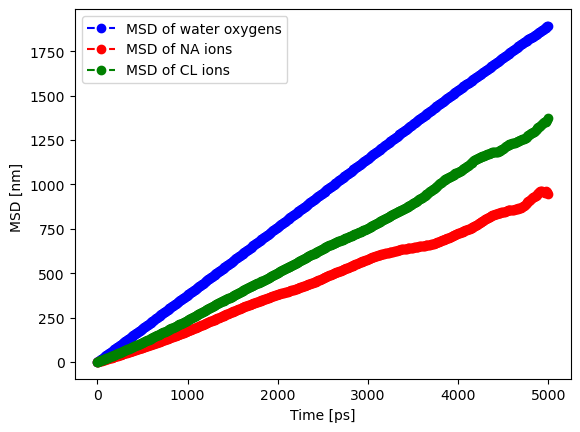

In [5]:
import matplotlib.pyplot as plt
import numpy as np

nframes = MSD_O.n_frames
timestep = 10 # ps
lagtimes = np.arange(nframes)*timestep # make the lag-time axis

plt.figure()
plt.plot(lagtimes,msd_timeseries_O/10,'--bo',label='MSD of water oxygens')
plt.plot(lagtimes,msd_timeseries_SOD/10,'--ro',label='MSD of NA ions')
plt.plot(lagtimes,msd_timeseries_CLA/10,'--go',label='MSD of CL ions')
plt.xlabel('Time [ps]')
plt.ylabel('MSD [nm] ')
#plt.ylim([0,5])
plt.legend()

plt.savefig('../Figures/ions_in_water_MSD.jpg')